<a href="https://colab.research.google.com/github/mgnarag/machine-learning/blob/main/VIP_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

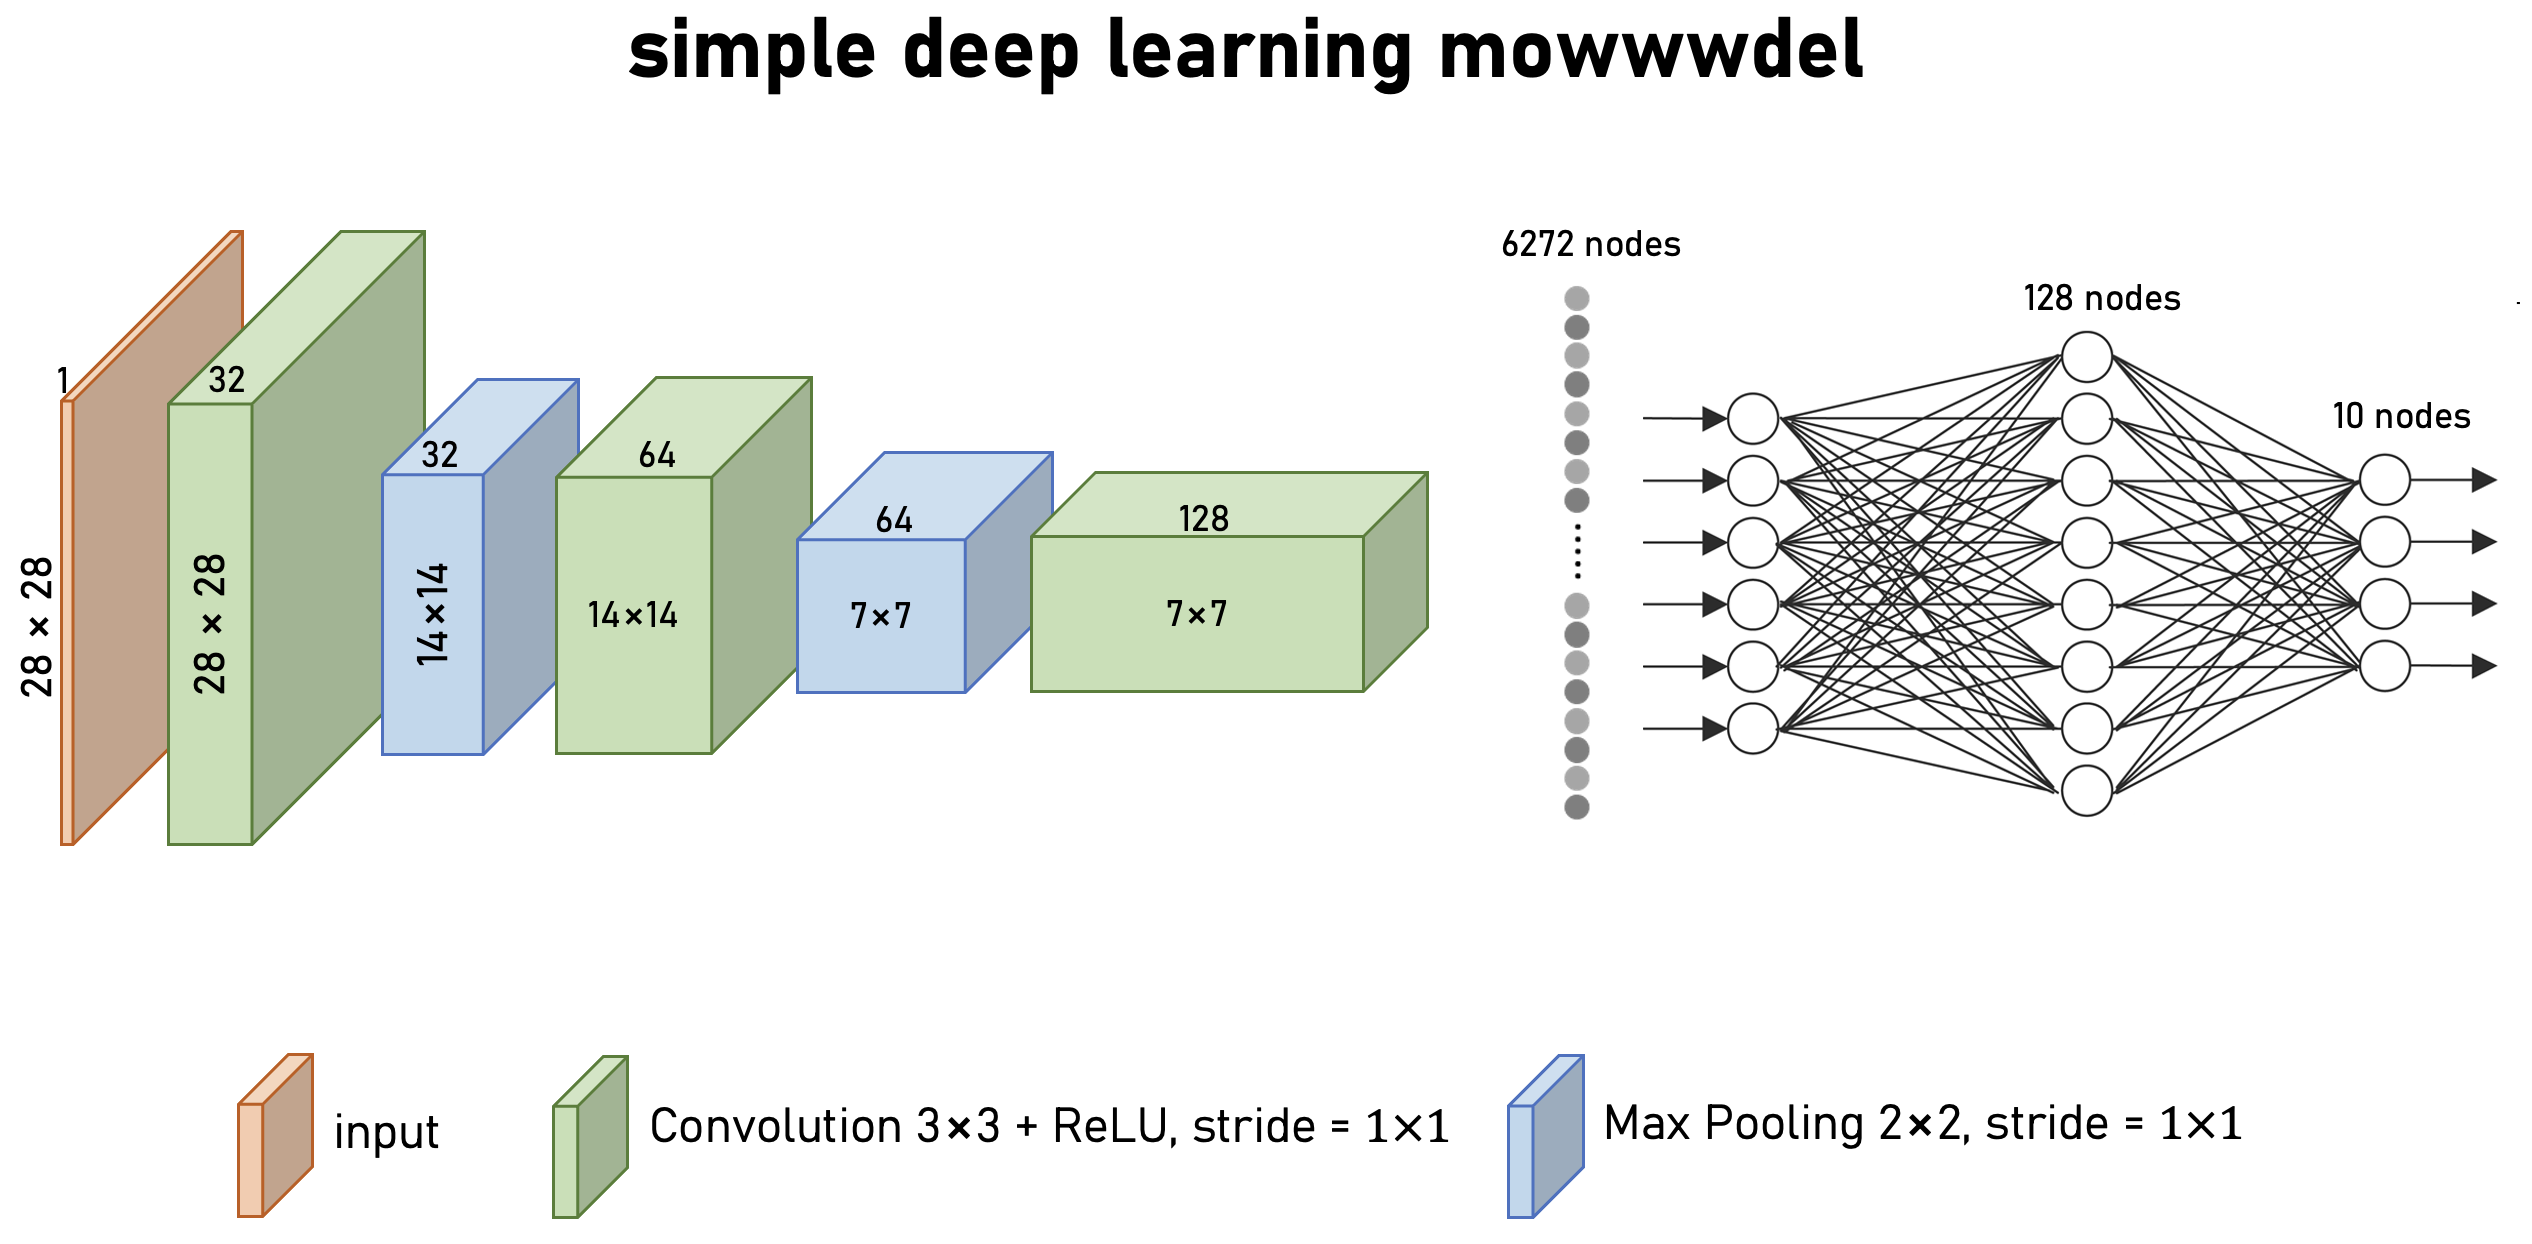# **STEP 1: IMPORT FASHION MNIST**

Deep learning requires thousands of data for it to work? So how are we gonna get thousands of images? Do we have to capture thousands of photos inside the lab? Nauuuuur! We can just use the FASHION MNIST dataset (https://github.com/zalandoresearch/fashion-mnist)!!!



*OMG FASHION! Like Chanel? Dior? Gucci? Who's the designer? Ghorl calm down!*




"FASHION" MNIST dataset contains 70,000 images - 60,000 for training and 10,000 for testing. All are in low resolution (28 by 28 pixels), grayscale images divided into 10 categories. *Categoriesss??? Like winter couture? avante-garde? street wear? Ghorl...no...shut up... parang ganito sis:*

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>



Daming ebas so how to load ghorl?

Ganito mhie kopyahin mo nalang:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist #standard na 'to sis di ko na iexplain ha?
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #ayan sis so idivide natin siya into training and testing.
# Nakadivide na actually yung fashion_mnist na dataset, need lang natin iextract yung training and testing.
# so yung train_images yan yung....images...omg shocking!
# tapos yung train_labels yan yung category per image beh so para siyang [0,3,2,5,1,6,3,8,...]. Yung unang picture ay category 0, second pic category 3, etc.

Ayaw mo maniwala na 60,000 yung training tapos 10,000 yung testing. Ito check natin beh:

In [ ]:
print('Shape of training images = ',train_images.shape)
print('Length of training labels = ',len(train_labels))
print('Shape of testing images = ',test_images.shape)
print('Length of testing labels = ',len(test_labels))

So ayun keri na sis may dataset na tayo. Bale eto pala yung 10 categories sis. Lagyan na natin ng name.

So category/label 0 is `T-shirt/top`, category/label 1 is `Trouser`...*trouser?? pants lang yan teh* then category/label 2  is `Pullover` then whatever go read the rest sis...

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#gagamitin natin 'to later sis. Basta i run mo na muna

Syempre VIP tayo so bet na bet natin pictures. Kaya tara na to the young and beautiful you!

In [3]:
plt.figure()
plt.imshow(train_images[0]) #palitan mo lang yang "0" if di mo bet yung pic
plt.show()

NameError: name 'plt' is not defined

Isang pic langggg??? Sige damihan natin:

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Ayon last but not the least bago tayo magtrain ng mowwwdel. Ipre-process muna natin. Actually keri naman na yung images, isang pre-processing lang need natin gawin and that is to make the pixel values range from 0 to 1.

Originally, 0 to 255 kasi yung dataset mhie.

So if you will ask me kimiii, bakit need gawing 0 to 1, bat hindi nalang 0 to 255. Well one reason is if magpeperform ka ng operation sa malaking value, say 255, ay mhieee lalaki at lalaki yung value mo mhie baka di kayanin ng computational prowess mo mhie baka di magconverge during training yung model mhie. Anyway, actually sobrang daming reason google mo nalangsss.

Ay wait so ayun eto na talaga. Ito na yung pre-processing:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
#ay pak yan na yun? yes mhie bet mo ba mas mahirap na code?

# **STEP 2: BUILDING THE MOWDEL**

Omg dis is eat! dis is really really is it is it!


So here we will use `tf.keras.Sequential`. From the name "sequential", ifofollow niya yung sequence ng codes mo.

For example, first layer is a convolutional layer with 32 filters and kernel size of 3 by 3 with relu activation function. In code this will translate us:

`tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),`

Then the next layer is a Max Pooling layer with kernel size 2 by 2. Since sequential siya, edi yung next line should be max pooling:

`tf.keras.layers.MaxPooling2D((2, 2)),`

And so on and so forth. So ayon yun na yun sis building blocks lang talaga siya. Dali lang no? Syempre kasi di na natin hinard code yung convolution and maxpooling layer huehue :D

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # put your code here#
    tf.keras.layers.Flatten(), # i2 na yung 6272 nodes beh. Oh bakit 6272 beh? compute mo nga check natin angas mo kimi
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])